In [23]:
#IMPORTA LIBRERIAS Y CARGA PAQUETES NECESARIOS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

In [33]:
#CARGA LOS DATOS
df = pd.read_excel('Data_proyecto_final_v3.xlsx')

#MUESTRA DESCRIPCION DE LA BASE
print(df.head())

   ID_CLIENTE     FLAG_EXISTENTE  EDAD GENERO  NUM_DEPENDIENTES  \
0   768805383  Existing Customer    45      M                 3   
1   818770008  Existing Customer    49      F                 5   
2   713982108  Existing Customer    51      M                 3   
3   769911858  Existing Customer    40      F                 4   
4   709106358  Existing Customer    40      M                 3   

  NIVEL_ACADEMICO ESTADO_CIVIL   RANGO_INGRESO TIPO_PRODUCTO  MESES_RELACION  \
0     High School      Married     $60K - $80K          Blue              39   
1        Graduate       Single  Less than $40K          Blue              44   
2        Graduate      Married    $80K - $120K          Blue              36   
3     High School      Unknown  Less than $40K          Blue              34   
4      Uneducated      Married     $60K - $80K          Blue              21   

   LIMITE_CREDITO  MONTO_TOTAL_TXN  CANT_TXN  TASA_USO  
0         12691.0             1144        42     0.061  
1 

In [34]:
#MUESTRA ESTADISTICOS GENERALES DE LA BASE
print(df.describe())

         ID_CLIENTE          EDAD  NUM_DEPENDIENTES  MESES_RELACION  \
count  1.012700e+04  10127.000000      10127.000000    10127.000000   
mean   7.391776e+08     46.325960          2.346203       35.928409   
std    3.690378e+07      8.016814          1.298908        7.986416   
min    7.080821e+08     26.000000          0.000000       13.000000   
25%    7.130368e+08     41.000000          1.000000       31.000000   
50%    7.179264e+08     46.000000          2.000000       36.000000   
75%    7.731435e+08     52.000000          3.000000       40.000000   
max    8.283431e+08     73.000000          5.000000       56.000000   

       LIMITE_CREDITO  MONTO_TOTAL_TXN      CANT_TXN      TASA_USO  
count    10127.000000     10127.000000  10127.000000  10127.000000  
mean      8631.953698      4404.086304     64.858695      0.274894  
std       9088.776650      3397.129254     23.472570      0.275691  
min       1438.300000       510.000000     10.000000      0.000000  
25%       2555.

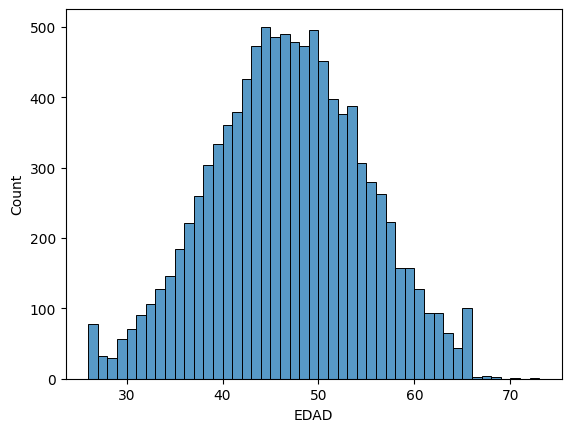

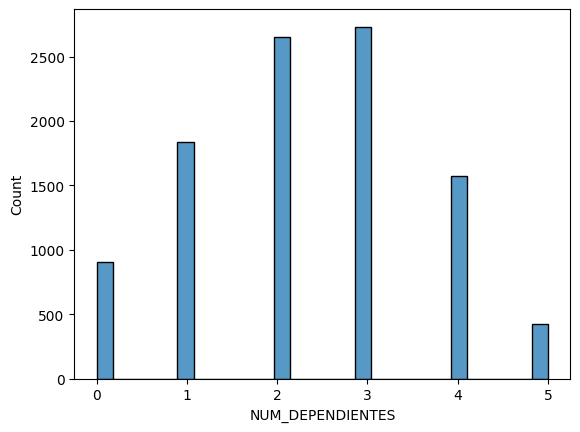

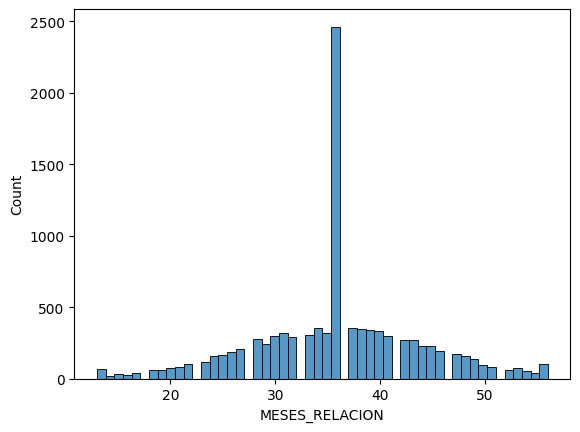

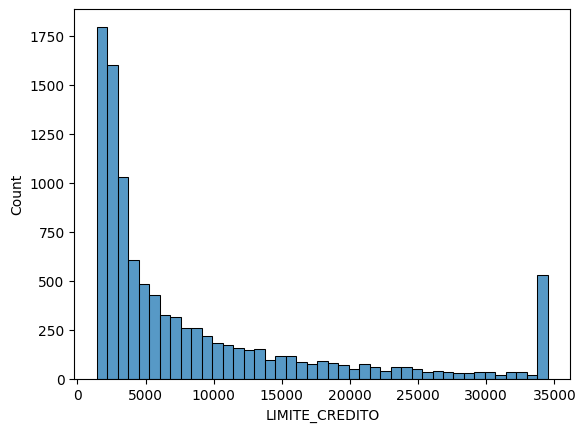

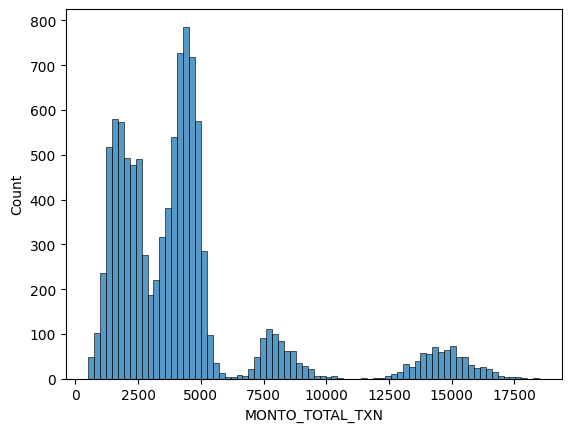

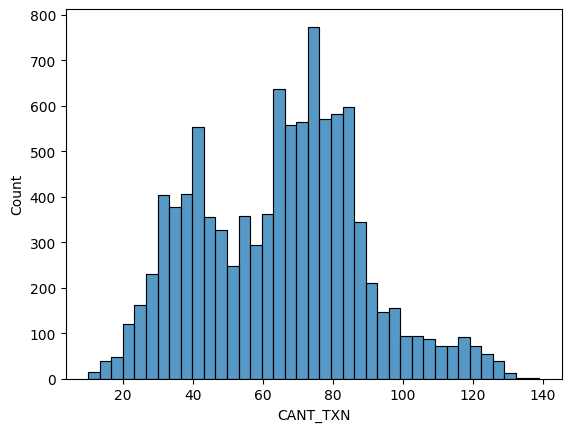

In [50]:
#MUESTRA HISTOGRAMA DE LAS VARIABLES CUANTITATIVAS PARA VER SU DISTRIBUCION
sns.histplot(df['EDAD'])
plt.show()
sns.histplot(df['NUM_DEPENDIENTES'])
plt.show()
sns.histplot(df['MESES_RELACION'])
plt.show()
sns.histplot(df['LIMITE_CREDITO'])
plt.show()
sns.histplot(df['MONTO_TOTAL_TXN'])
plt.show()
sns.histplot(df['CANT_TXN'])
plt.show()

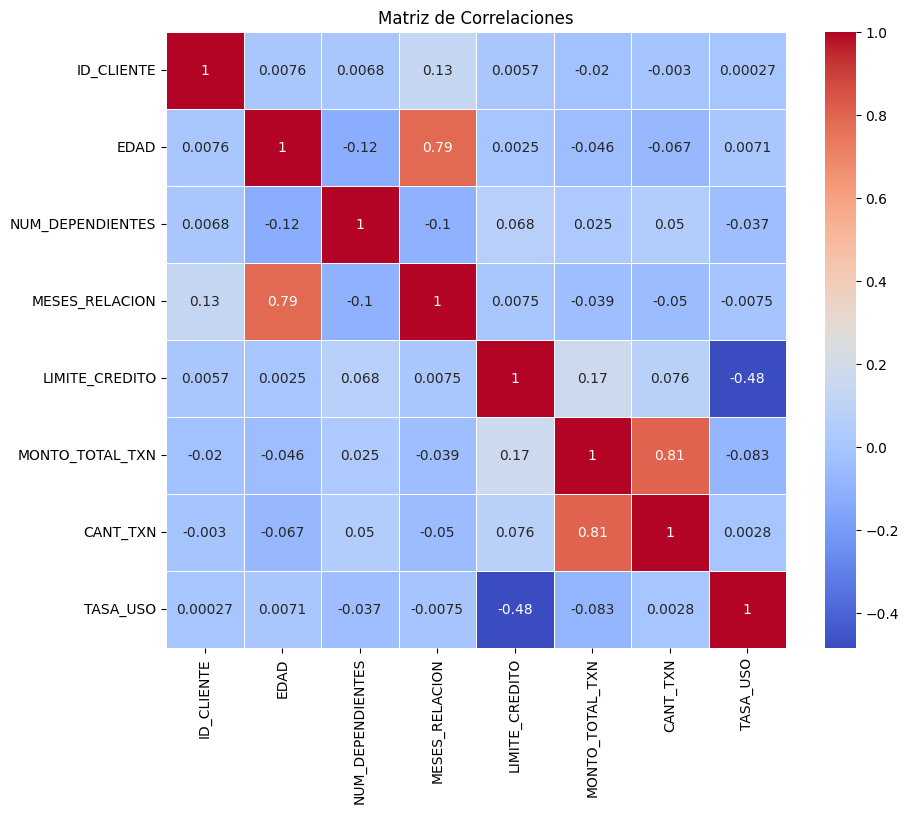

In [ ]:

#CONSTRUYE MATRIZ DE CORRELACIONES
correlation_matrix = df.corr(numeric_only=True)

#CREA MAPA DE CALOR
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()


In [68]:
#CREA COPIA DEL DATAFRAME
df_model = df.copy()

#CREA VARIABLE PREDICTORA
df_model['CHURN'] = df_model['FLAG_EXISTENTE'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

#ELIMINA COLUMNAS CON POCO APORTE
df_model = df_model.drop(columns=['ID_CLIENTE', 'FLAG_EXISTENTE'])

#CODIFICA VARIABLES CATEGORICAS
df_model = pd.get_dummies(df_model, drop_first=True)


In [ ]:
#DIVIDE DATOS EN ENTRENAMIENTO Y PRUEBA
X = df_model.drop(columns=['CHURN'])
y = df_model['CHURN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [70]:
#ENTRENA EL MODELO RF

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [71]:
#EVALUA EL MODELO
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


[[2497   54]
 [ 167  321]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2551
           1       0.86      0.66      0.74       488

    accuracy                           0.93      3039
   macro avg       0.90      0.82      0.85      3039
weighted avg       0.92      0.93      0.92      3039

ROC AUC Score: 0.9676440772181916


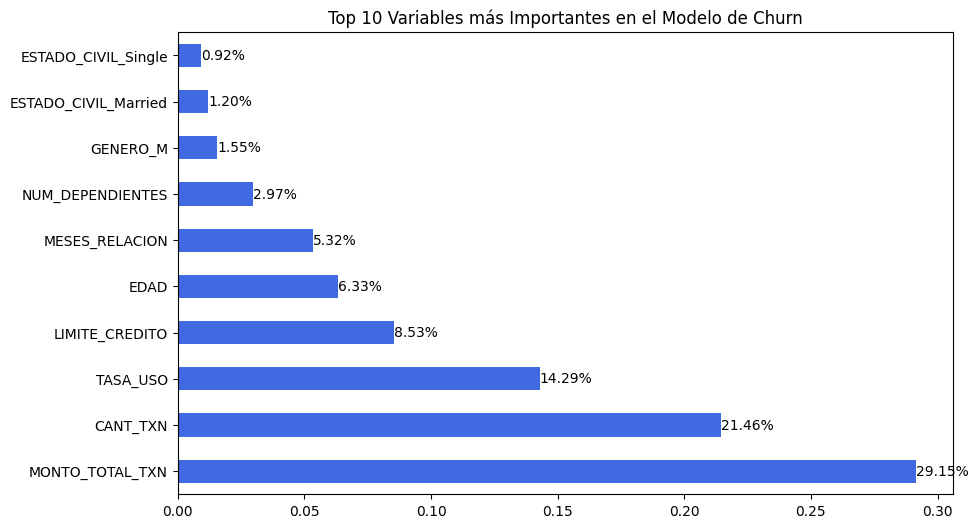

In [76]:
#IMPORTANCIA DE LAS VARIABLES
importances = pd.Series(model.feature_importances_, index=X.columns)
top_importances = importances.nlargest(10)

plt.figure(figsize=(10, 6))
ax = top_importances.plot(kind='barh', color='royalblue')
plt.title("Top 10 Variables más Importantes en el Modelo de Churn")

for index, value in enumerate(top_importances):
    plt.text(value, index, f"{value * 100:.2f}%", va='center')
plt.show()


In [ ]:
#HACE PREDICCION DE CHURN SOBRE BASE DE PRUEBA(0 = NO CHURN, 1 = CHURN)
y_pred = model.predict(X_test)

#CALCULA LA PROBABILIDAD DE CHURN
y_prob = model.predict_proba(X_test)[:, 1]

#CREA DATAFRAME PARA VISUALIZAR PREDICCIONES
predicciones = pd.DataFrame({
    'CHURN_REAL': y_test.values,
    'CHURN_PREDICHO': y_pred,
    'PROBABILIDAD_CHURN': y_prob
})

#TOP 10 PREDICCIONES
print(predicciones.head(15))


    CHURN_REAL  CHURN_PREDICHO  PROBABILIDAD_CHURN
0            0               0                0.02
1            0               0                0.00
2            0               0                0.22
3            0               0                0.04
4            0               0                0.00
5            1               1                0.61
6            0               0                0.29
7            0               0                0.00
8            0               0                0.00
9            0               0                0.05
10           0               0                0.01
11           1               0                0.14
12           0               0                0.01
13           0               0                0.02
14           1               0                0.04
